In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data
df=pd.read_csv('data/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# select our target
y = df.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [5]:
#select our label/features
X = df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


<AxesSubplot:xlabel='Exited', ylabel='count'>

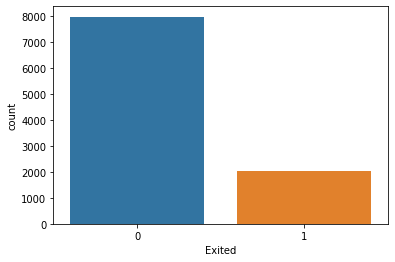

In [6]:
sns.countplot(y)

<AxesSubplot:xlabel='Geography', ylabel='count'>

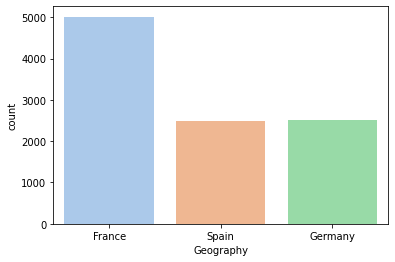

In [7]:
sns.countplot(X['Geography'], palette='pastel')

In [8]:
df['Gender'].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

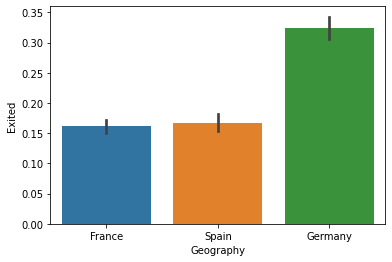

In [9]:
sns.barplot(x='Geography', y='Exited', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

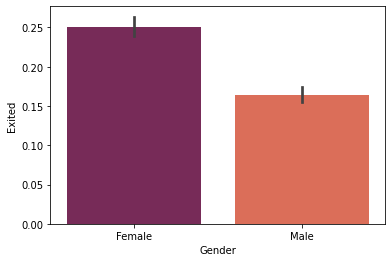

In [10]:
sns.barplot(x='Gender', y='Exited', data=df, palette='rocket')

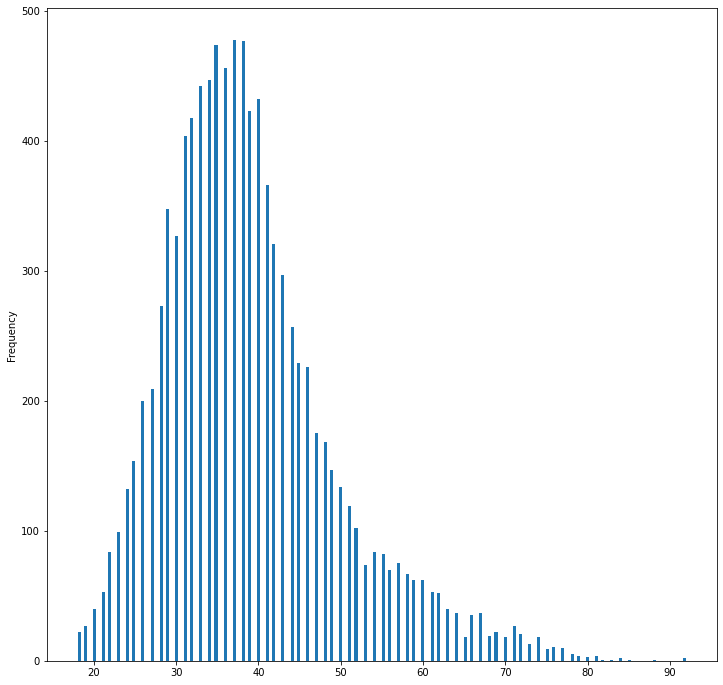

In [11]:
df.Age.plot(kind='hist', bins=200, figsize=(12,12))
plt.show()

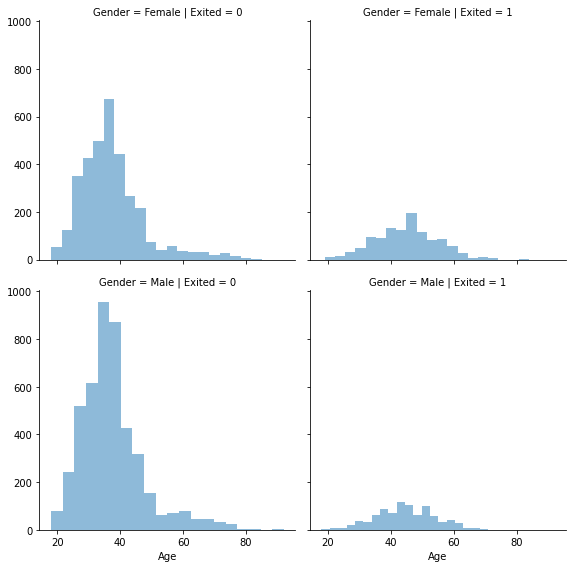

In [12]:
g = sns.FacetGrid(df, row='Gender', col ='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

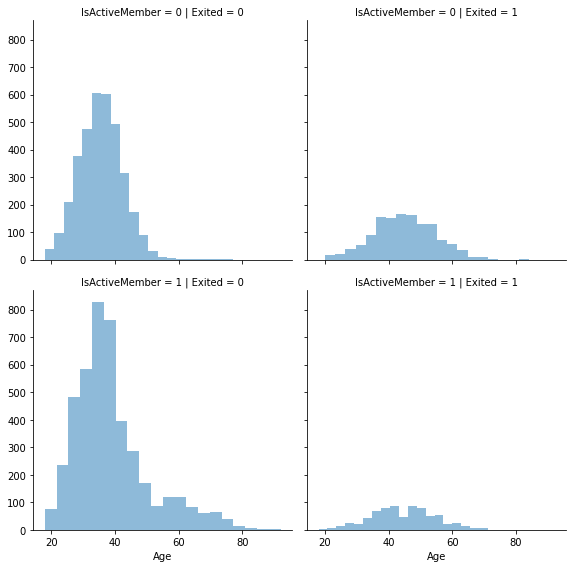

In [13]:
g = sns.FacetGrid(df, row='IsActiveMember', col ='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(7))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Gender, dtype: int32


In [15]:
X['Geography'] = label.fit_transform(X['Geography'])
print(X['Geography'].head())

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int32


In [16]:
X['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
pd.get_dummies(X)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42)

In [20]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [21]:
X_train

array([[ 1.07684322,  1.50034763,  0.90565911, ...,  0.64722807,
         0.96581473,  0.56276126],
       [ 0.22458265,  1.50034763, -1.10416821, ...,  0.64722807,
         0.96581473, -1.58504165],
       [-0.46138317, -0.90168675,  0.90565911, ...,  0.64722807,
        -1.03539526, -1.07751299],
       ...,
       [ 0.85858137, -0.90168675, -1.10416821, ..., -1.54505043,
        -1.03539526, -0.1530867 ],
       [ 0.1518287 , -0.90168675,  0.90565911, ...,  0.64722807,
        -1.03539526, -0.06146547],
       [ 0.46363135,  0.29933044,  0.90565911, ...,  0.64722807,
         0.96581473, -0.82256561]])

In [22]:
X_test

array([[-0.52456675,  0.32037467,  0.92508347, ..., -1.55283806,
        -1.02195525, -0.99004915],
       [-0.24722938, -0.90242941,  0.92508347, ...,  0.64398215,
         0.97851643,  0.84239847],
       [-0.47320798,  1.54317874, -1.08098353, ...,  0.64398215,
        -1.02195525, -0.69618492],
       ...,
       [ 0.65668498, -0.90242941, -1.08098353, ..., -1.55283806,
        -1.02195525, -0.82260884],
       [-1.24358954,  1.54317874, -1.08098353, ...,  0.64398215,
        -1.02195525,  0.20703203],
       [-0.67864306,  0.32037467, -1.08098353, ...,  0.64398215,
        -1.02195525,  0.74877698]])

In [23]:
#shape of train and test data
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (6500, 10) (6500,)
Test set: (3500, 10) (3500,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
neigh = KNeighborsClassifier(n_neighbors =4).fit(X_train, y_train)

In [26]:
prediction = neigh.predict(X_test)

In [27]:
prediction1= pd.DataFrame(prediction)
prediction1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [28]:
from sklearn import metrics
percent1 =metrics.accuracy_score(y_test, prediction)
percent1

0.8368571428571429

In [30]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
y_pred = classifier.predict(X_test)

In [34]:
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [35]:
percent2=metrics.accuracy_score(y_test, prediction2)
percent2

0.8645714285714285

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=100)
classifier_4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_randomfor=classifier_4.predict(X_test)

In [38]:
prediction3 =pd.DataFrame(y_randomfor)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
percent3 = metrics.accuracy_score(y_t)